In [ ]:
%matplotlib inline

In [ ]:
#import dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics as sts


In [ ]:
#create files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [ ]:
#read the city data file and save as pandas dataframe
city_data_df = pd.read_csv(city_data_to_load)
city_data_df

In [ ]:
#read the ride data file and save as pandas dataframe
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df

In [ ]:
#Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how='left', on=['city', 'city'])

#Display the DataFrame
pyber_data_df.head()

In [ ]:
#Create the Urban City DataFrame
urban_cities_df = pyber_data_df[pyber_data_df["type"]== 'Urban']
urban_cities_df

In [ ]:
#Create the Suburban and Rural city DataFrames
suburban_cities_df = pyber_data_df[pyber_data_df['type']== 'Suburban']
rural_cities_df = pyber_data_df[pyber_data_df['type']== 'Rural']
suburban_cities_df.head()

In [ ]:
#Get the number of rides for urban cities
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
urban_ride_count.head()

In [ ]:
#Get the suburban and rural ride count
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']
suburban_ride_count.head()

In [ ]:
#Get the average fare for each city in the urban cities
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
urban_avg_fare.head()

In [ ]:
#Get the average fare for each city in the suburban and rural areas
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare.head()

In [27]:
#Get the average number of drivers for each urban city
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

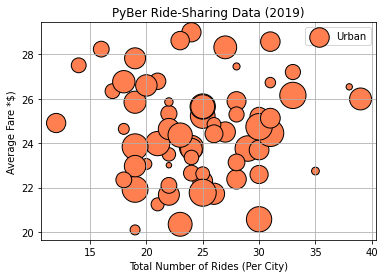

In [28]:
#Build the scatter plots for urban citeis.
plt.scatter(urban_ride_count, 
            urban_avg_fare,
           s=10*urban_driver_count, c='coral',
           edgecolor='black', label='Urban')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)

#Add legend
plt.legend()

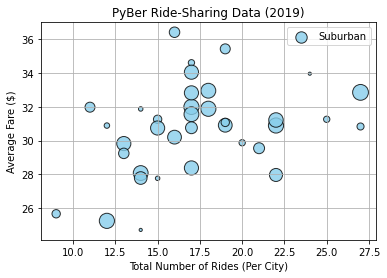

In [35]:
#Create scatter plot for suburban cities
plt.scatter(suburban_ride_count,
           suburban_avg_fare,
           s=10*suburban_driver_count, c='skyblue',
           edgecolor='black', linewidths=1,
           alpha=0.8, label='Suburban')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)

#Add the legend
plt.legend()

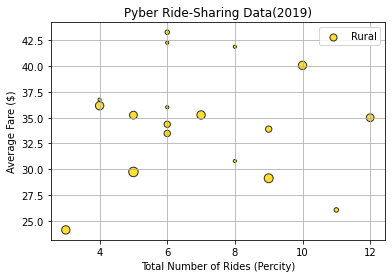

In [36]:
#Create scatter plot for rural cities
plt.scatter(rural_ride_count,
           rural_avg_fare,
           s=10*rural_driver_count, c='gold',
           edgecolor='black', linewidths=1,
           alpha=0.8, label='Rural')
plt.title('Pyber Ride-Sharing Data(2019)')
plt.xlabel('Total Number of Rides (Percity)')
plt.ylabel('Average Fare ($)')
plt.grid(True)

#add the legend
plt.legend()

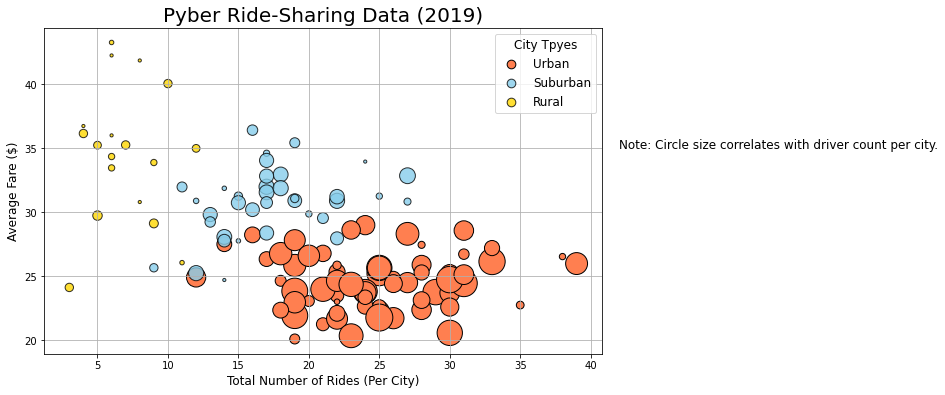

In [44]:
#Add the scatter charts for each type of city
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count, 
            urban_avg_fare,
           s=10*urban_driver_count, c='coral',
           edgecolor='black', label='Urban')

plt.scatter(suburban_ride_count,
           suburban_avg_fare,
           s=10*suburban_driver_count, c='skyblue',
           edgecolor='black', linewidths=1,
           alpha=0.8, label='Suburban')

plt.scatter(rural_ride_count,
           rural_avg_fare,
           s=10*rural_driver_count, c='gold',
           edgecolor='black', linewidths=1,
           alpha=0.8, label='Rural')

#Incorporate other graph properties
plt.title('Pyber Ride-Sharing Data (2019)', fontsize=20)
plt.xlabel('Total Number of Rides (Per City)', fontsize=12)
plt.ylabel('Average Fare ($)', fontsize=12)
plt.grid(True)

#add the legend
lgnd = plt.legend(fontsize='12', mode='Expanded',
                 scatterpoints=1, loc='best', title="City Tpyes")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

#Incorporate a text label about circle size
plt.text(42,35,'Note: Circle size correlates with driver count per city.', fontsize=12)

#Save the figure
plt.savefig('analysis/fig1.png')

#Show the plot
plt.show()
